# Inductive Miner (Infrequent) Prototyping

### Inductive Miner - Base

In [16]:
%reload_ext autoreload
%autoreload 2

from practical.ProcessMining.group1.task3.inductiveminer import InductiveMiner
from practical.ProcessMining.group1.task3.inductiveminer_infrequent import InductiveMinerInfrequent
from practical.ProcessMining.group1.shared.utils import read_txt_test_logs
import pandas as pd
from IPython.display import Image, display
from pm4py import format_dataframe
from pm4py.visualization.process_tree import visualizer as pt_vis
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import tempfile
from practical.ProcessMining.group1.shared import utils
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.conversion.process_tree import converter as pt_converter

def visualize_pm4py_process_tree(log):
    if isinstance(log, str):
        event_log = pd.read_csv('../shared/example_files/helpdesk_log.csv', sep=';')
        event_log = format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    else:
        data = [{'case:concept:name': idx, 'concept:name': activity, 'time:timestamp': idx}
                for idx, trace in enumerate(log)
                for activity in trace]
        df = pd.DataFrame(data)
        event_log = log_converter.apply(df)
    process_tree = inductive_miner.apply(event_log, variant=inductive_miner.Variants.IM)
    gviz_tree = pt_vis.apply(process_tree)
    
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_file:
        pt_vis.save(gviz_tree, temp_file.name)
        display(Image(filename=temp_file.name))
    

def visualize_custom_miner(miner):
    miner.run()
    print(miner)
    display(miner.visualize_process_tree())
    miner.build_and_visualize_petrinet()

def run(log):
    miner = InductiveMiner(log)
    # PM4Py visualization
    # visualize_pm4py_process_tree(log)
    
    # Custom implementation visualization
    print("=== INDUCTIVE BASE ===")
    visualize_custom_miner(miner)

def run_infrequent(log, treshhold=0.3):
    miner = InductiveMinerInfrequent(log, treshhold)
    print("=== INDUCTIVE INFR ===")
    visualize_custom_miner(miner)

In [17]:
BASE = utils.SAMPLES_PATH

def get_path(file):
    return str(BASE / file)

def get_logs(file_path):
   return utils.import_csv(file_path)

def custom_to_pm4py_log(log):
    log = utils.event_log_to_pm4py_dataframe(log)
    return log_converter.to_event_log.apply(log)

def csv2event_logs(csv_file):
    path = get_path(csv_file)
    # print('file_path ======', path)
    log = utils.import_csv(path)
    event_log = log_converter.to_event_log.apply(log)
    return event_log

def get_viz_for_real_log(log):
    event_log = csv2event_logs(log)
    thresholds = [0.0, 0.25, 0.5, 0.75]

    for threshold in thresholds:
      # 使用 inductive miner infrequent 方法
      parameters = {"noiseThreshold": threshold}
      tree = inductive_miner.apply(event_log, parameters=parameters)
    
      # 导出过程树为图像
      gviz_tree = pt_visualizer.apply(tree)
      pt_visualizer.view(gviz_tree)
      pt_visualizer.save(gviz_tree, f'process_tree_threshold_{threshold}.png')

      # 从过程树导出 Petri 网
      net, initial_marking, final_marking = pt_converter.apply(tree)
    
      # 导出 Petri 网为图像
      gviz_pn = pn_visualizer.apply(net, initial_marking, final_marking)
      pn_visualizer.view(gviz_pn)
      pn_visualizer.save(gviz_pn, f'petrinet_threshold_{threshold}.png')

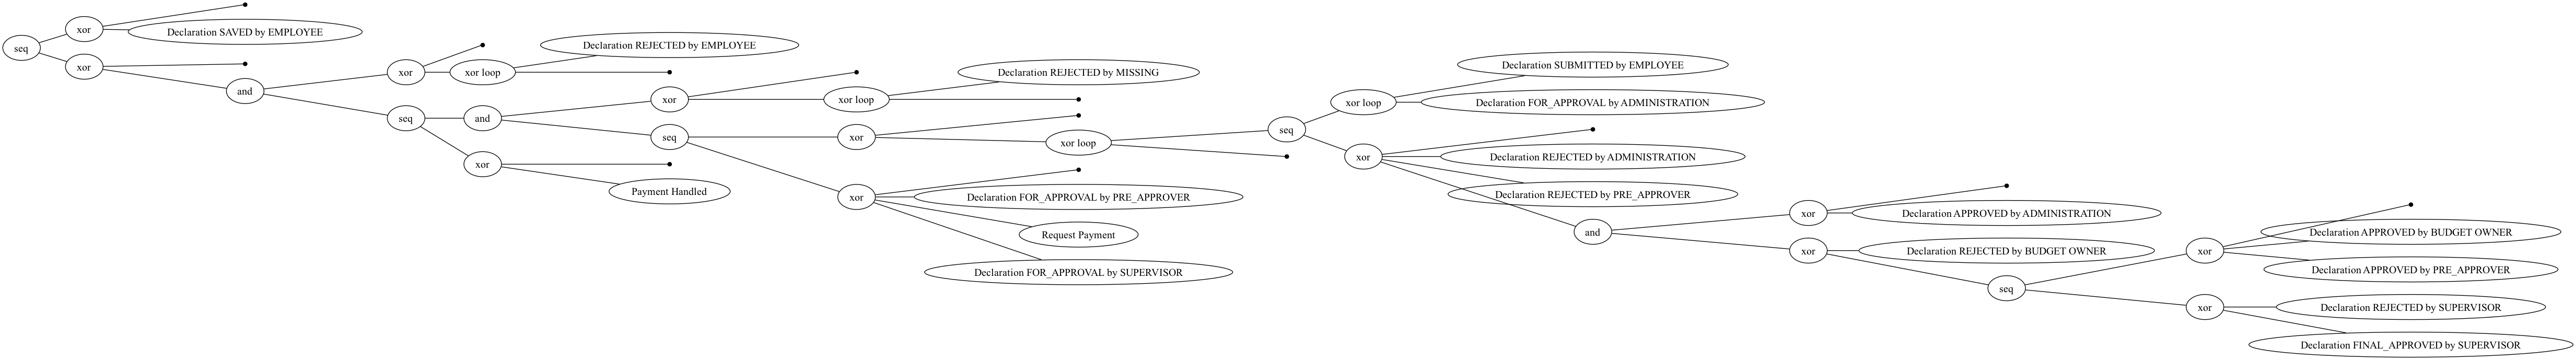

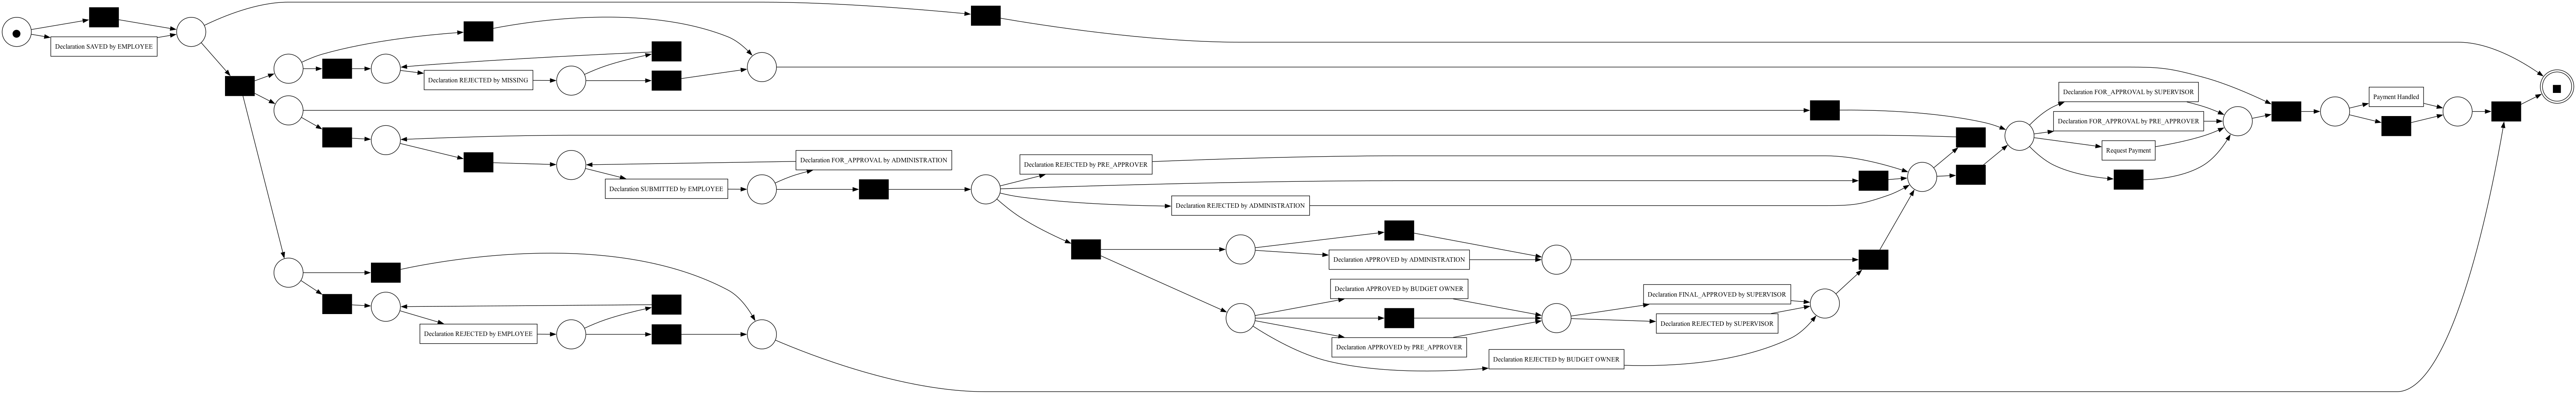

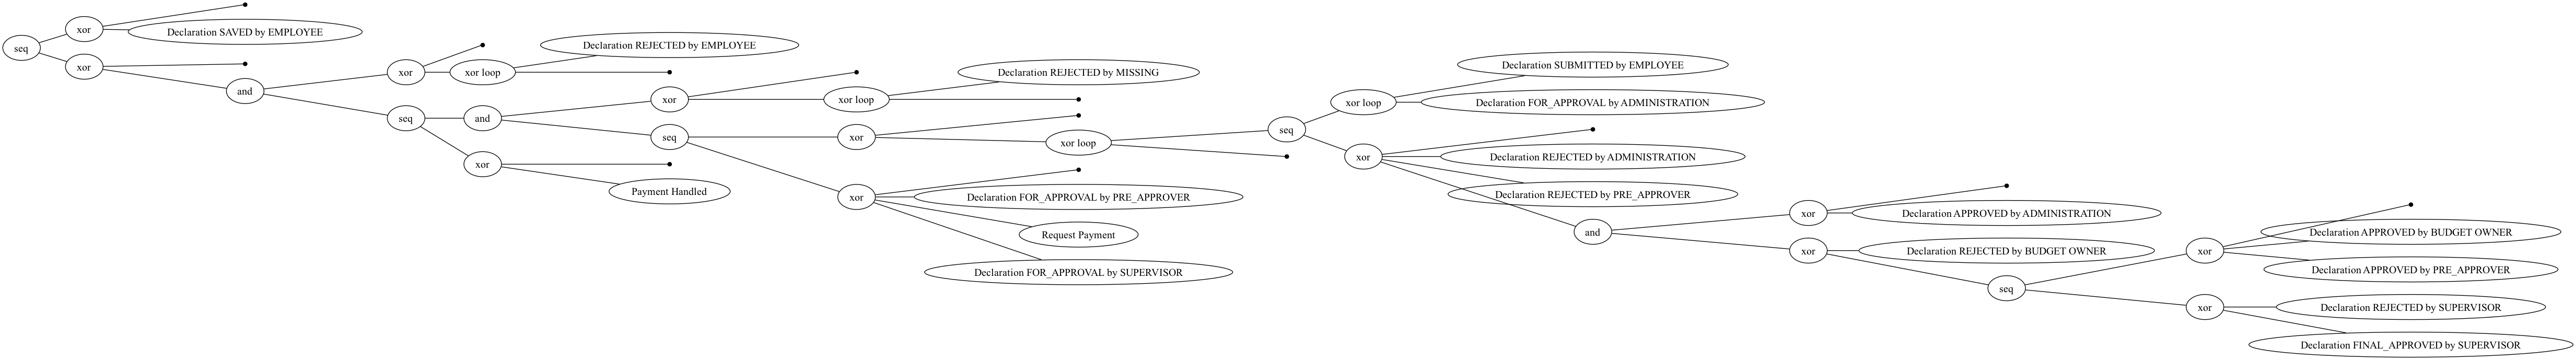

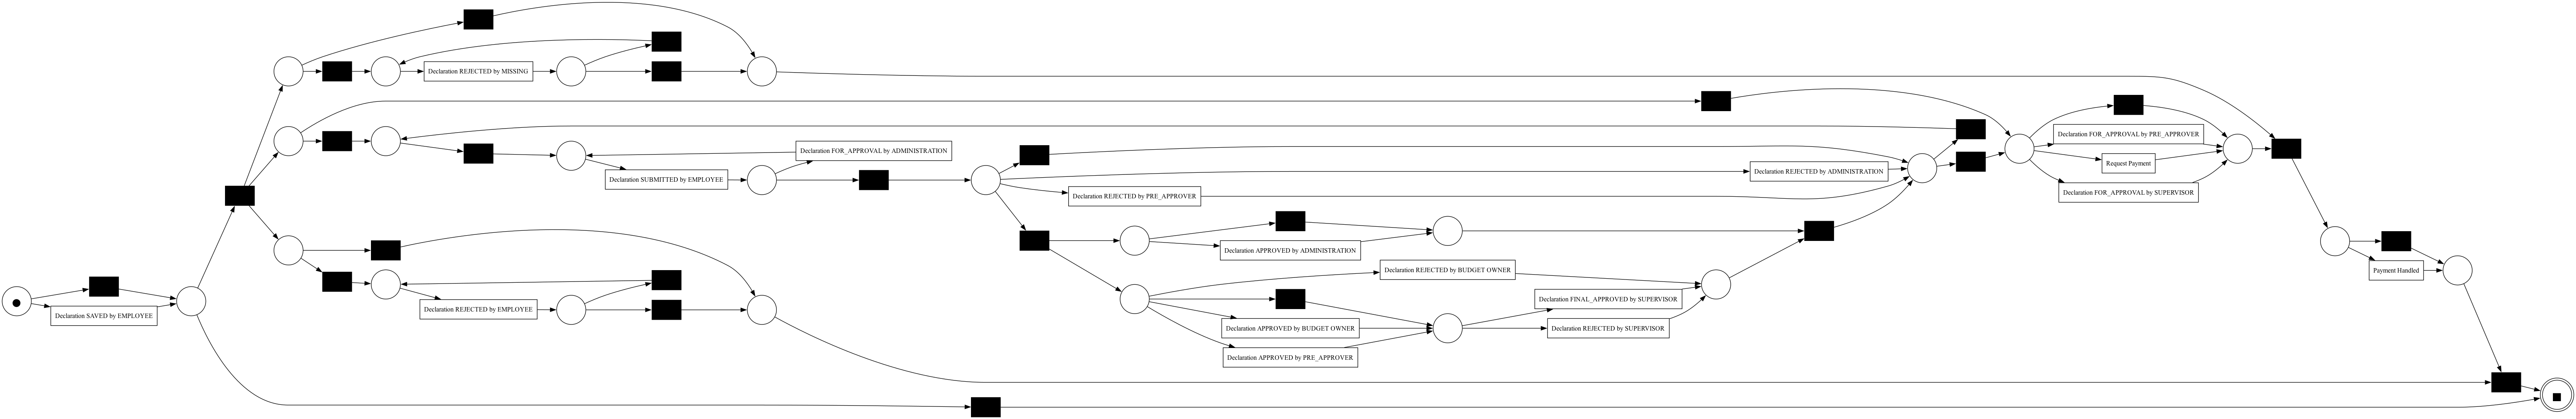

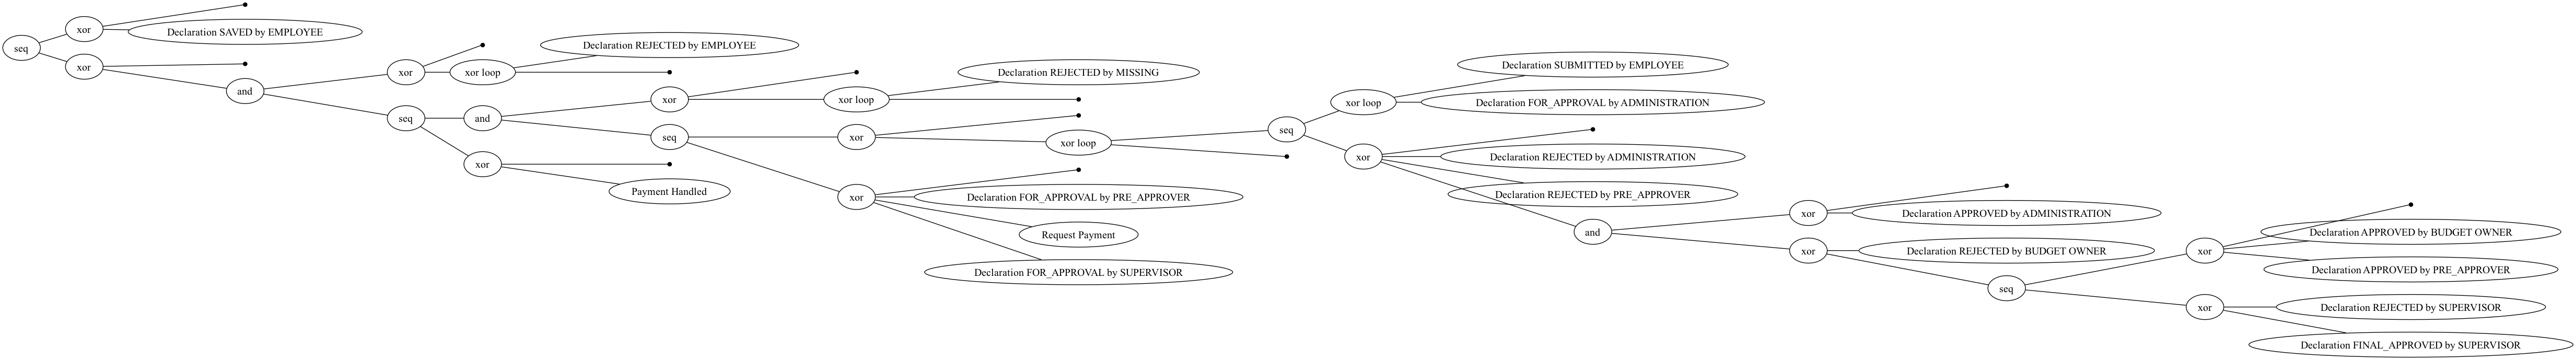

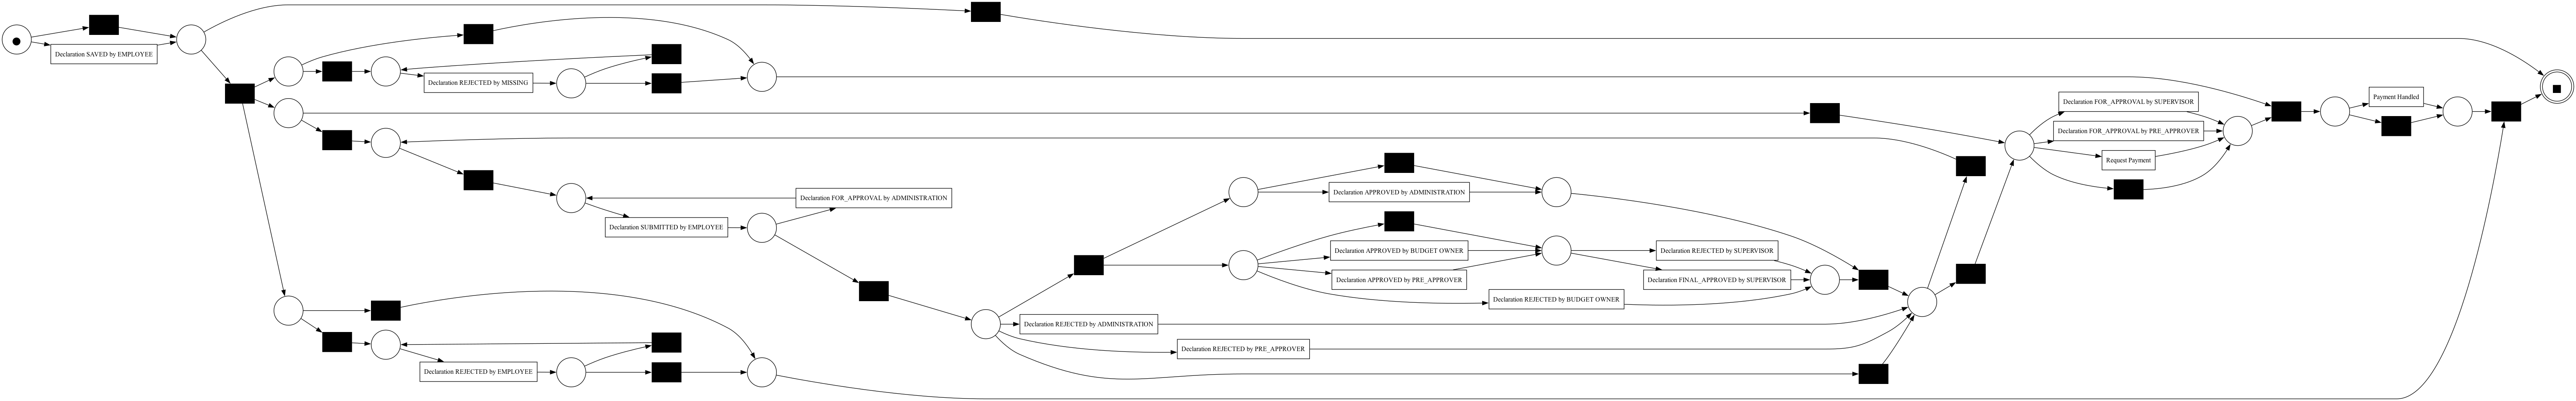

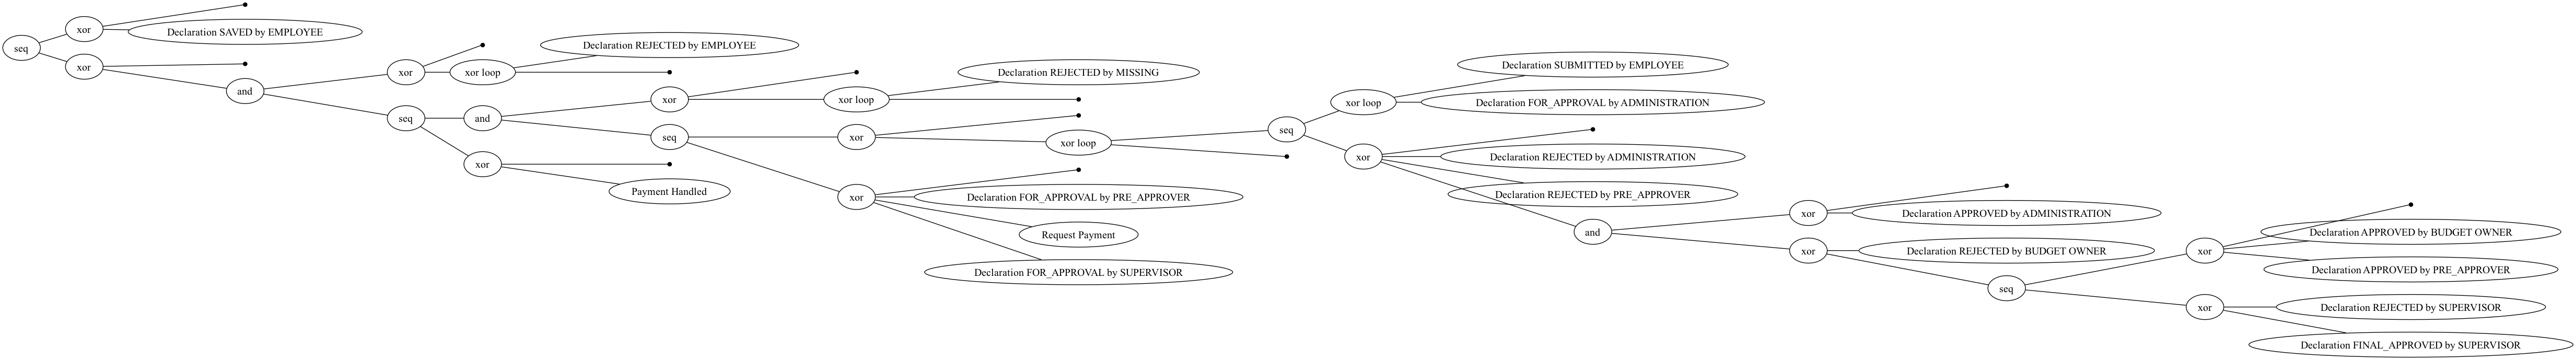

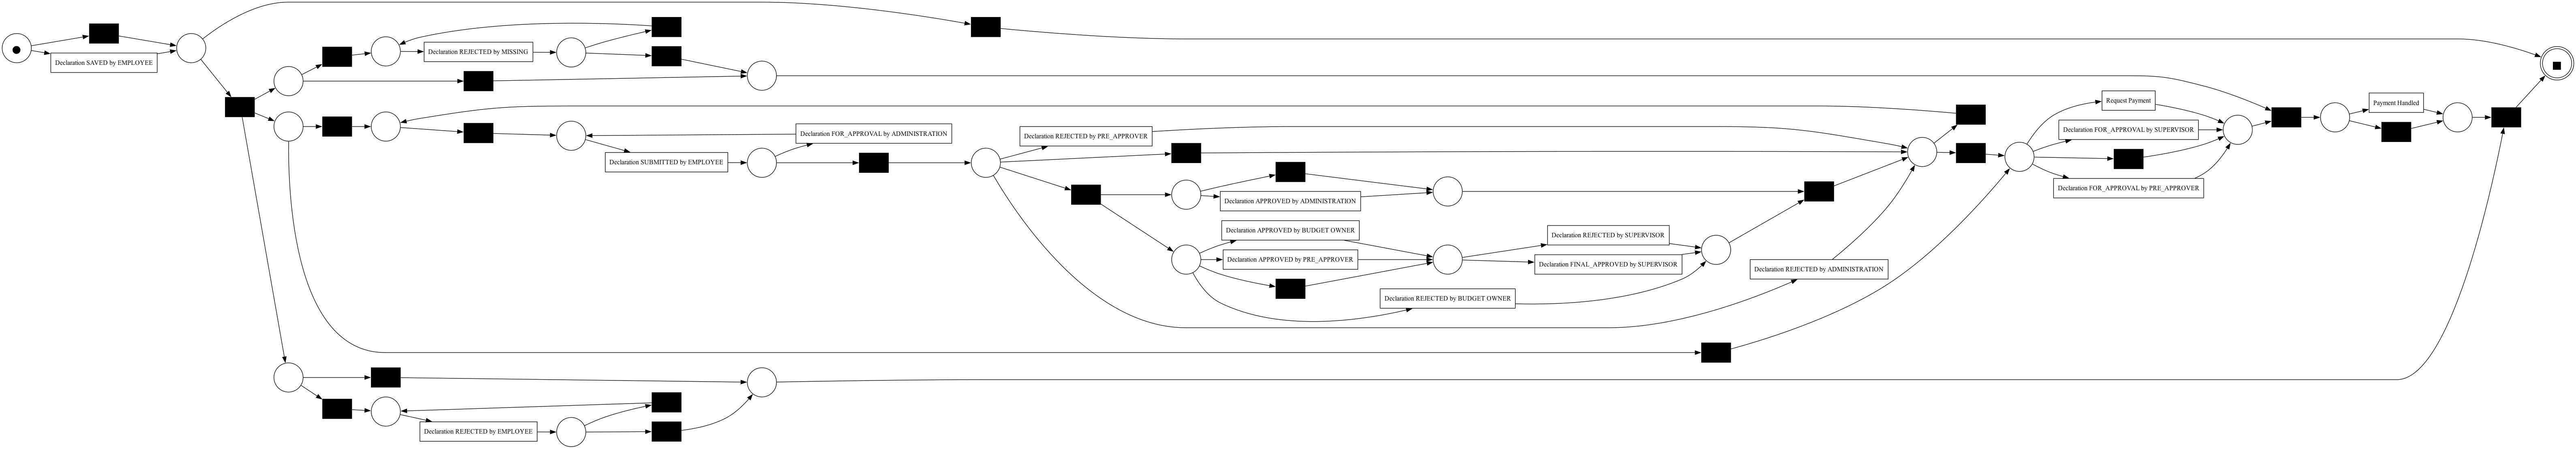

In [18]:
get_viz_for_real_log("DomesticDeclarations_cleansed.csv")

Sequence Logs

In [ ]:
log = [('a', 'b', 'c', 'd', 'e', 'f', 'g')]
run(log)

XOR Logs

In [ ]:
log = [('a', 'c', 'i'), ('d', 'e', 'k' ,'h'), ('a', 'c', 'j'), ('d', 'e', 'h', 'f')]
run(log)

Mixed Logs

In [ ]:
## Parallel Log
log = [('b', 'e'),
       ('b', 'e', 'c', 'd', 'b'),
       ('b', 'c', 'e', 'd', 'b'),
       ('b', 'c', 'd', 'e', 'b'),
       ('e', 'b', 'c', 'd', 'b')]
run(log)

In [ ]:
log = [('a', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'd'),
       ('a', 'b', 'c', 'e', 'f', 'c', 'b', 'd'),
       ('a', 'c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b', 'd')]
run(log)

In [ ]:
log = [('b', 'c'),
 ('c', 'b'),
 ('b', 'c', 'e', 'f', 'b', 'c'),
 ('c', 'b', 'e', 'f', 'b', 'c'),
 ('b', 'c', 'e', 'f', 'c', 'b'),
 ('c', 'b', 'e', 'f', 'b', 'c', 'e', 'f', 'c', 'b')]
run(log)

Tau Logs

In [ ]:
log = [('',), ('a',), ('a', 'a')]
run(log)

In [ ]:
log = [('a', 'b', 'c', 'd'), ('d', 'a', 'b'), ('a', 'd', 'c'), ('b', 'c', 'd',)]
run(log)

In [ ]:
log = [('a', 'c', 'd', 'e', 'b'),
       ('a', 'b', 'a', 'e', 'd', 'c'),
       ('a', 'e', 'c', 'b', 'd'),
       ('a', 'd', 'b', 'c', 'e')]

#run_freq(log, 0.3)
miner = InductiveMinerInfrequent(log, 0.3)
miner.run()
print(miner)

In [ ]:
run([('a',), ('a',), ('a',)])

In [ ]:
run([('',), ('a',), ('a',)])

In [ ]:
run([('a',), ('a', 'a'), ('a', 'a', 'a')])

In [ ]:
run([('',), ('a',), ('a', 'a')])

# Test with simple event logs

### Inductive Miner - Comparison base vs infrequent

In [ ]:
test_logs = read_txt_test_logs("../shared/example_files/simple_event_logs.txt")

for key in test_logs.keys():
    print(f"======== {key} =========\n")
    run(test_logs[key])
    run_infrequent(test_logs[key])

# Test with real event logs

Polato, Mirko (2017): Dataset belonging to the help desk log of an Italian Company. Version 1. 4TU.ResearchData. dataset. https://doi.org/10.4121/uuid:0c60edf1-6f83-4e75-9367-4c63b3e9d5bb

In [ ]:
run('../shared/example_files/helpdesk_log.csv')

In [ ]:
run_infrequent('../shared/example_files/helpdesk_log.csv', 0.9)